In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('data1.csv', delimiter=',')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['smoker'].isna().sum()

0

In [4]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [5]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [6]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [7]:
df['smoker'].count()

1338

In [8]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [9]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [10]:
df['children'].isna().sum()

0

In [11]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [12]:
df['sex'].isna().sum()

0

In [13]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [14]:
df['region'].isna().sum()

0

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [16]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

text_categories = ['region', 'smoker', 'sex']

preprocessor = ColumnTransformer([
    ("encoder", OneHotEncoder(), text_categories),
    ("scaler", StandardScaler(), [col for col in x.columns if col not in text_categories]),
])

pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("lr", LinearRegression())
    ]
)

In [17]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['region', 'smoker', 'sex']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('lr', LinearRegression())])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
import seaborn as sns

/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: xlabel='bmi', ylabel='charges'>

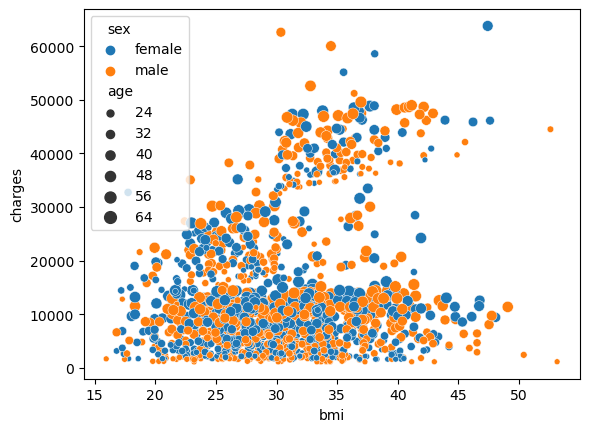

In [21]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='sex', size='age')

In [22]:
preprocessor.fit_transform(x)

array([[ 0.        ,  0.        ,  0.        , ..., -1.43876426,
        -0.45332   , -0.90861367],
       [ 0.        ,  0.        ,  1.        , ..., -1.50996545,
         0.5096211 , -0.07876719],
       [ 0.        ,  0.        ,  1.        , ..., -0.79795355,
         0.38330685,  1.58092576],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -1.50996545,
         1.0148781 , -0.90861367],
       [ 0.        ,  0.        ,  0.        , ..., -1.29636188,
        -0.79781341, -0.90861367],
       [ 0.        ,  1.        ,  0.        , ...,  1.55168573,
        -0.26138796, -0.90861367]])

In [23]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['region', 'smoker', 'sex']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('lr', LinearRegression())])

In [24]:
df[['bmi','charges', 'age']].corr()

,bmi,charges,age
bmi,1.000000,0.198341,0.109272
charges,0.198341,1.000000,0.299008
age,0.109272,0.299008,1.000000


In [25]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [26]:
ypred = pipe.predict(xtest)

In [27]:
ytest.shape

(442,)

In [28]:
ypred.shape

(442,)

In [29]:
ytest = ytest.to_numpy()

/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<Axes: >

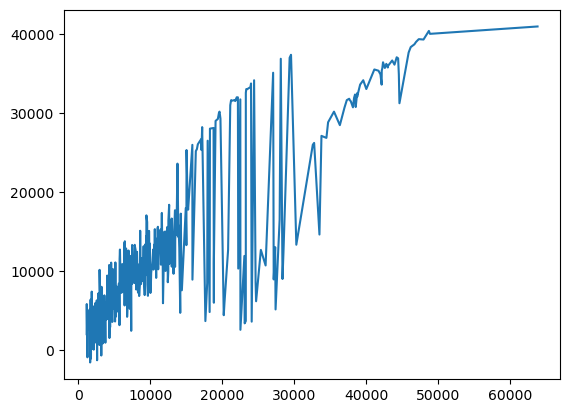

In [30]:
sns.lineplot(x=ytest.reshape(442), y=ypred.reshape(442))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

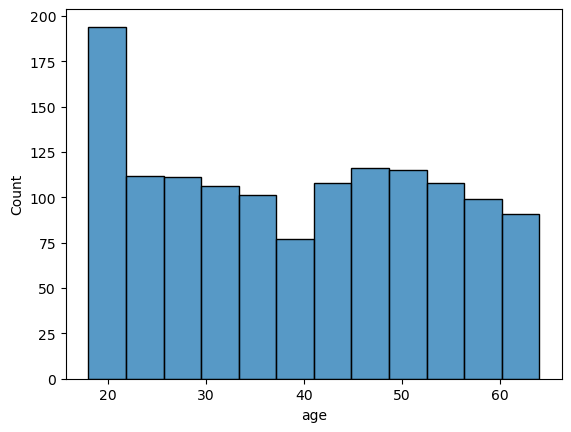

In [32]:
sns.histplot(df['age'])

/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

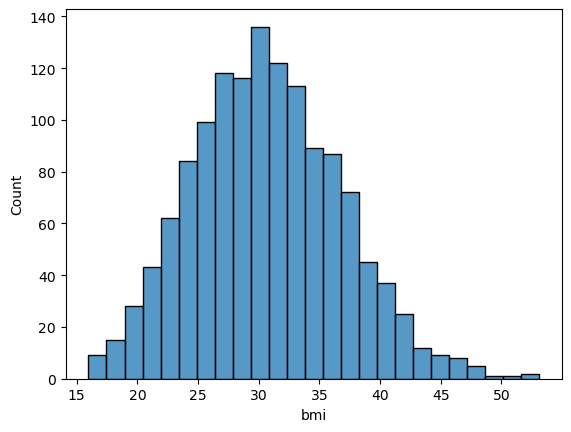

In [33]:
sns.histplot(df['bmi'])

/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: xlabel='charges', ylabel='Count'>

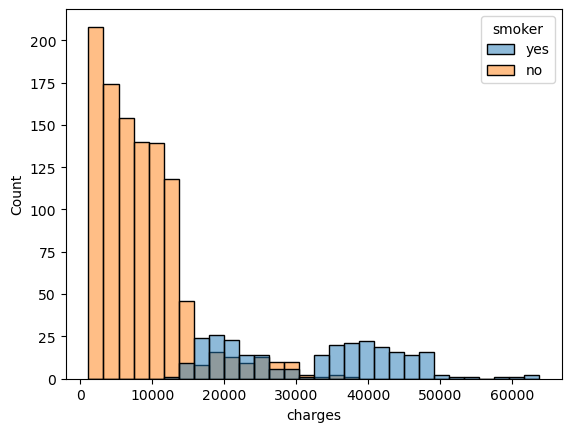

In [34]:
sns.histplot(x='charges', hue="smoker", data=df)

/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: xlabel='age', ylabel='charges'>

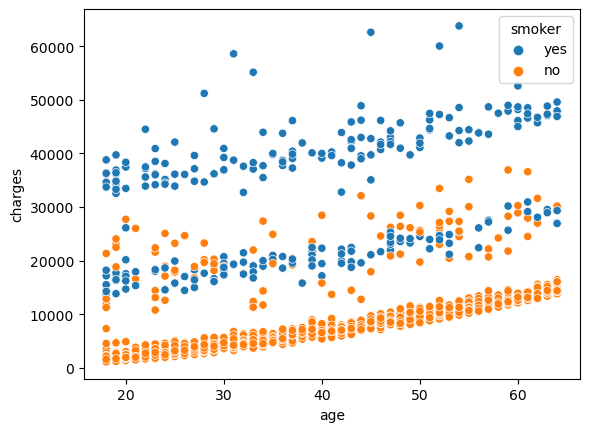

In [35]:
sns.scatterplot(x="age", y="charges", data=df, hue="smoker")

In [36]:
# weights, bias

In [37]:
import numpy as np

In [39]:
mse = np.mean(np.square(ytest-ypred))
mse

35090225.72562569

In [40]:
np.sqrt(mse)

5923.700340633858

In [42]:
pipe.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [43]:
pipe.named_steps['lr'].coef_

array([   507.5006912 ,    167.88229534,   -378.99888994,   -296.38409659,
       -11850.49164341,  11850.49164341,    -60.56184313,     60.56184313,
         3715.37443286,   2075.88345505,    447.82622387])

In [44]:
# model, cost, optimizer

/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='smoker', ylabel='charges'>

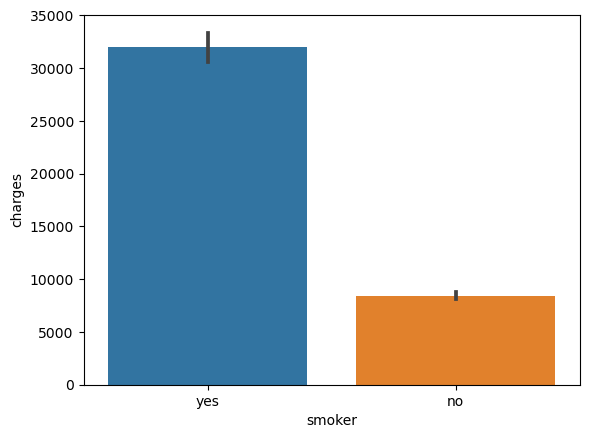

In [49]:
sns.barplot(x="smoker", y="charges", data=df)

/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='region', ylabel='charges'>

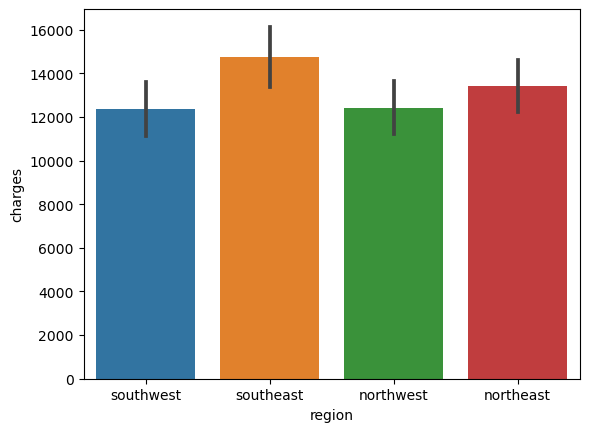

In [50]:
sns.barplot(x="region", y="charges", data=df)

/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='children', ylabel='charges'>

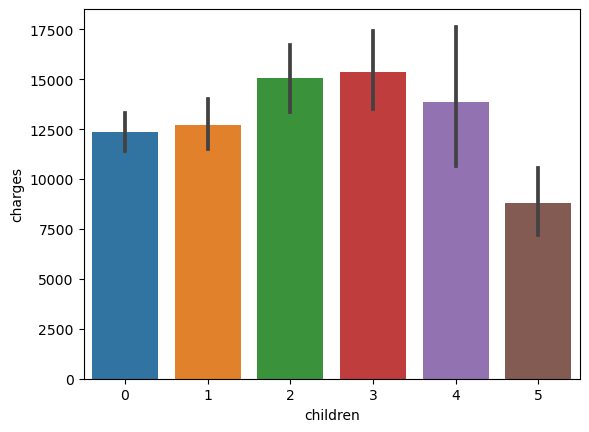

In [51]:
sns.barplot(x="children", y="charges", data=df)

In [53]:
# logistic regression
# used for binary classification
# 0 to 1 probability prediction z = w0+w1x1+w2x2
# sigmoid function = 1/(1+e^(-z))
# cross entropy loss

In [54]:
# df.dropna(subsets=[])

In [55]:
df.sample(frac=0.1)

,age,sex,bmi,children,smoker,region,charges
1225,33,female,39.820,1,no,southeast,4795.65680
1189,23,female,28.000,0,no,southwest,13126.67745
554,25,female,41.325,0,no,northeast,17878.90068
141,26,male,32.490,1,no,northeast,3490.54910
209,40,male,41.230,1,no,northeast,6610.10970
...,...,...,...,...,...,...,...
784,31,female,29.260,1,no,southeast,4350.51440
289,52,male,26.400,3,no,southeast,25992.82104
533,37,male,36.190,0,no,southeast,19214.70553
607,59,female,23.655,0,yes,northwest,25678.77845


In [58]:
# hyperparameter 
# validaion set
# time series data splitting
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [59]:
# method of filling missing values in the dataset is called imputation
from sklearn.impute import SimpleImputer

In [60]:
SimpleImputer(strategy="mean")

SimpleImputer()

In [63]:
# ?SimpleImputer

In [64]:
# saving the dataset after preprocessing AS parquet or pyarrow

In [65]:
from sklearn.metrics import confusion_matrix

In [1]:
# joblib
# hyperparameter tuning
# esemble is the general technique of combining various models

In [6]:
# sklearn.ensemble 